## COSC 6880 - DATA ANALYTICS
## Assignment 2: Hypothesis Testing
#### Author: Khoi Nguyen
#### Date: 02/19/2024

## Hypothesis 8: The monthly average wind speed in Corpus Christi per year in the period 2000-2024 follows a normal distribution. 

- Null hypothesis (H<sub>0</sub>): The monthly average wind speed in Corpus Christi per year in the period 2000-2024 follows a normal distribution. 
- Alternative hypothesis (H<sub>1</sub>): The monthly average wind speed in Corpus Christi in at least one year in the period 2000-2024 does not a normal distribution. 

First we will get the monthly precipitation data of Corpus Christi for the years 2000-2024.

### Environment Setup

In [6]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from scipy import stats

#### Loading Data

In [7]:
corpus_christi_point_data_2000_2006 = pd.read_csv('data/corpus_christi_2000_2006.csv')

In [8]:
corpus_christi_point_data_2007_2024 = pd.read_csv('data/corpus_christi_2007_2024.csv')

In [9]:
# merge the two dataframes
corpus_christi_point_data = pd.concat([corpus_christi_point_data_2000_2006, corpus_christi_point_data_2007_2024])

In [10]:
corpus_christi_point_data['NAME'].unique()

array(['CORPUS CHRISTI NWS, TX US', 'CHAPMAN RANCH, TX US',
       'C C BOTANICAL GARDENS, TX US', 'CORPUS CHRISTI NAS, TX US',
       'CORPUS CHRISTI INTERNATIONAL AIRPORT, TX US',
       'FLOUR BLUFF 1.6 SW, TX US', 'CORPUS CHRISTI 7.8 SSE, TX US',
       'CORPUS CHRISTI 3.4 WSW, TX US', 'CORPUS CHRISTI 4.0 S, TX US',
       'CORPUS CHRISTI 8.2 SSE, TX US', 'CORPUS CHRISTI 4.8 SSE, TX US',
       'CORPUS CHRISTI 6.4 NW, TX US', 'CORPUS CHRISTI 8.7 SSE, TX US',
       'CORPUS CHRISTI 5.1 WNW, TX US', 'PORT ARANSAS 11 SSW, TX US',
       'CORPUS CHRISTI 3.1 WNW, TX US',
       'INGLESIDE ON THE BAY 0.7 NE, TX US', 'INGLESIDE 0.6 W, TX US',
       'CORPUS CHRISTI CABANISS FIELD NAVAL OUTLYING FIELD, TX US',
       'CORPUS CHRISTI 9.0 SSE, TX US', 'CORPUS CHRISTI 6.4 WSW, TX US',
       'CORPUS CHRISTI 8.0 WNW, TX US', 'CORPUS CHRISTI 5.7 WSW, TX US',
       'CORPUS CHRISTI 7.4 SSE, TX US', 'CORPUS CHRISTI 6.7 WSW, TX US',
       'CORPUS CHRISTI 5.6 WNW, TX US', 'PORTLAND 1.3 NW, TX US',

#### Performing analyses to try to prove or disprove the null hypothesis

In [11]:
# calculate mean of PRCP by time
corpus_christi_ws_data = corpus_christi_point_data.groupby('DATE')['AWND'].mean()
corpus_christi_ws_data = corpus_christi_ws_data.reset_index()

In [12]:
# filter the year 2020
corpus_christi_ws_data_2000 = corpus_christi_ws_data[corpus_christi_ws_data['DATE'].str.contains('2000')]
corpus_christi_ws_data_2000

,DATE,AWND
0,2000-01,12.3
1,2000-02,14.3
2,2000-03,14.5
3,2000-04,12.5
4,2000-05,13.0
5,2000-06,11.4
6,2000-07,11.9
7,2000-08,9.6
8,2000-09,10.5
9,2000-10,12.1


C:\Users\nhkho\AppData\Local\Temp\ipykernel_20484\488520076.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


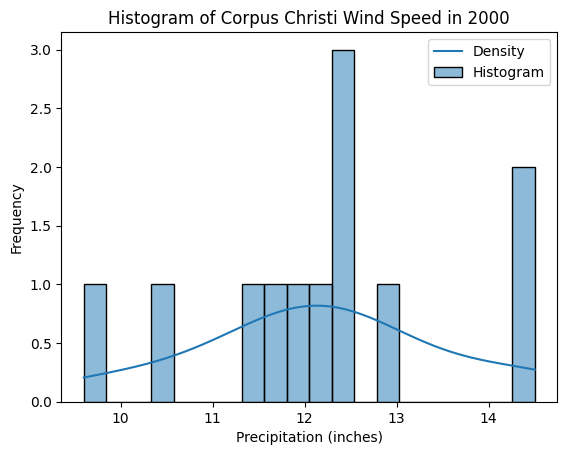

In [13]:
# histogram of precip values
fig, ax = plt.subplots()
sns.histplot(corpus_christi_ws_data_2000['AWND'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Wind Speed in 2000')
ax.set_xlabel('Precipitation (inches)')
ax.set_ylabel('Frequency')
# set legend for the kde line and the histogram
ax.legend(['Density', 'Histogram'])
fig.show()

C:\Users\nhkho\AppData\Local\Temp\ipykernel_20484\4160092655.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


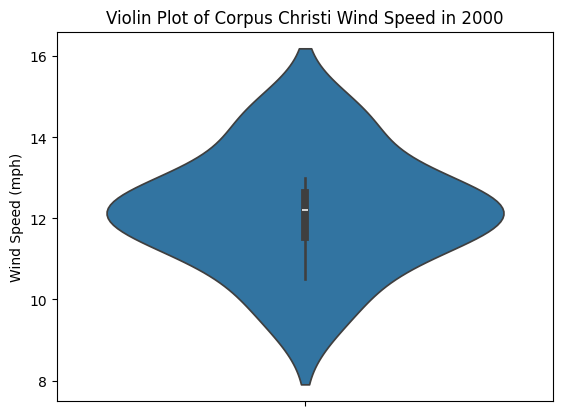

In [14]:
# violin plot of wind speed in 2000
fig, ax = plt.subplots()
sns.violinplot(y='AWND', data=corpus_christi_ws_data_2000, ax=ax)
ax.set_title('Violin Plot of Corpus Christi Wind Speed in 2000')
ax.set_ylabel('Wind Speed (mph)')
fig.show()

C:\Users\nhkho\AppData\Local\Temp\ipykernel_20484\2317936037.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


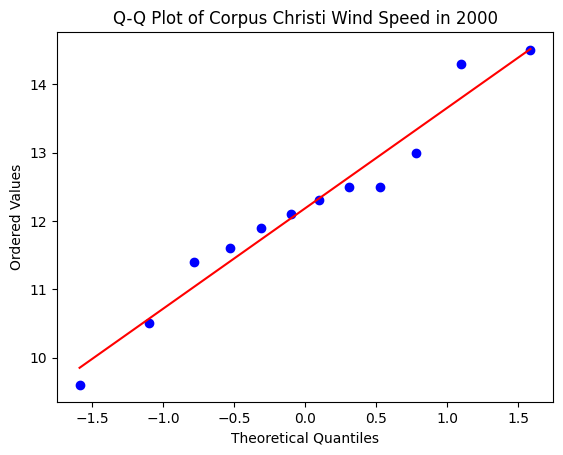

In [15]:
# Q-Q plot of wind speed in 2000
fig, ax = plt.subplots()
stats.probplot(corpus_christi_ws_data_2000['AWND'], dist="norm", plot=plt)
ax.set_title('Q-Q Plot of Corpus Christi Wind Speed in 2000')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')
fig.show()

As from the distribution line from histogram, we can see the bell-shaped line, which is considerably similar to normal distribution line. However, we cannot conclude that just from observing this line and instead, we should perform further analysis to evaluate more about this.

In [16]:
# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(corpus_christi_ws_data_2000['AWND'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))

Statistics=0.963, p-value=0.823


Since the distribution line has bell shape which form a normal distribution signature, and the p-value from Shapiro-Wilk test is higher than 0.5, there has been no concrete evidence to prove or disprove the null hypothesis yet.

In [17]:
def chi_square_normality(data):
    bin_edges = np.arange(0, max(data) + 1, 1)  # Adjust binning as needed
    observed_freq, _ = np.histogram(data, bins=bin_edges)

    # Calculate expected frequencies for a normal distribution
    mean = np.mean(data)
    std = np.std(data)
    expected_freq = [len(data) * (stats.norm.cdf(bin_edges[i+1], mean, std) - stats.norm.cdf(bin_edges[i], mean, std)) for i in range(len(bin_edges)-1)]

    # Adjust expected frequencies to ensure the sum matches the sum of the observed frequencies
    expected_freq = np.array(expected_freq)
    expected_freq *= sum(observed_freq) / sum(expected_freq)

    # Perform the Chi-square test
    chi_square_stat, p_value = stats.chisquare(observed_freq, expected_freq)

    print(f"Chi-square statistic: {chi_square_stat}, p-value: {p_value}")

#### Chi-square test

To prove or disprove the hypthesis, assuming that the Hypothesis H<sub>0</sub> is true, in which the precipitation in Corpus Christi between 2022 and 2024 is normally distributed. Therefore, we can calculate the expected value in Chi-square test by the special characteristics of normal distribution.

In [18]:
chi_square_normality(corpus_christi_ws_data_2000['AWND'])

Chi-square statistic: 3.189909675380524, p-value: 0.9986878097272525


This test also indicates that the data is very similar to normal distribution

Therefore, we will continue to perform the hypothesis testing with year 2001.

In [19]:
corpus_christi_ws_data_2001 = corpus_christi_ws_data[corpus_christi_ws_data['DATE'].str.contains('2001')]

C:\Users\nhkho\AppData\Local\Temp\ipykernel_20484\25683064.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


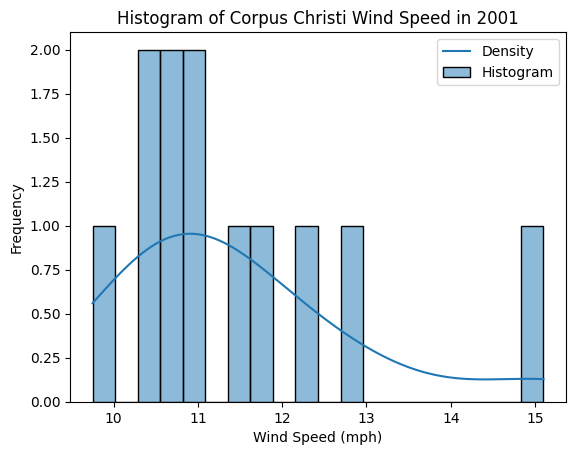

In [20]:
# histogram of average wind speed in 2001
fig, ax = plt.subplots()
sns.histplot(corpus_christi_ws_data_2001['AWND'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Wind Speed in 2001')
ax.set_xlabel('Wind Speed (mph)')
ax.set_ylabel('Frequency')
# set legend for the kde line and the histogram
ax.legend(['Density', 'Histogram'])
fig.show()

C:\Users\nhkho\AppData\Local\Temp\ipykernel_20484\2213315340.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


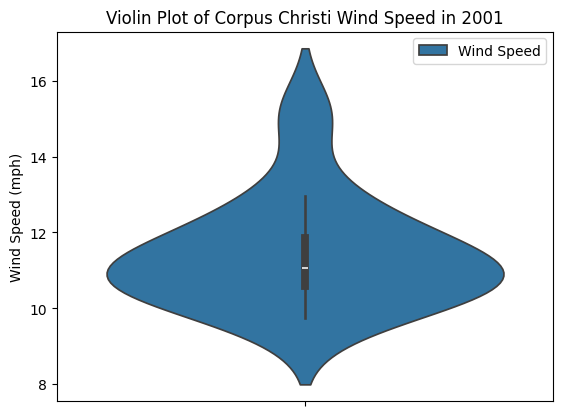

In [21]:
# violin plot of wind speed in 2001
fig, ax = plt.subplots()
sns.violinplot(y='AWND', data=corpus_christi_ws_data_2001, ax=ax)
ax.set_title('Violin Plot of Corpus Christi Wind Speed in 2001')
ax.set_ylabel('Wind Speed (mph)')
# set legend for violin plot
ax.legend(['Wind Speed'])
fig.show()

Although we can properly reject the hypothesis by observing the skewness of the histogram graph, we can also apply some quantitative analyses to the same hypothesis.

In [22]:
# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(corpus_christi_ws_data_2001['AWND'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))

Statistics=0.862, p-value=0.052


When applying the Shapiro-Wilk test for normality testing with the monthly average wind speed data in 2001, the acquired p-value is 0.052, which is much lower than 0.5. Therefore, we can conclude that the monthly average wind speed in 2001 does not follow normal distribution, and reject the null hypothesis H<sub>0</sub>.

In [25]:
chi_square_normality(corpus_christi_ws_data_2001['AWND'])

Chi-square statistic: 18.975111024085592, p-value: 0.21486394678746454


When applying Chi-square test, the p-value is 0.2148639467874645, which is also below 0.5. Therefore, we can apparently reject null the hypothesis.